In [203]:
# Data Cleaning
import pandas as pd
from scipy import stats

# Raw

In [204]:
raw = pd.read_csv('raw-global-food.csv'
                  ,delimiter=',')
df = raw.copy()
df.head(8)

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.634680,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.046130,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.859990,1.4260,NaN,500000.0,...,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.960000,1.4257,NaN,505000.0,...,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.273220,1.4400,NaN,500000.0,...,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301
5,NaN,Afghanistan,1966,9783153.0,720000.0,0.073596,73.595904,1.4400,NaN,500000.0,...,NaN,NaN,72000.0,0.007360,7.359590,42.214058,115.654952,356.85892,9.435363,5.013813
6,NaN,Afghanistan,1967,10010037.0,768000.0,0.076723,76.722994,1.4144,NaN,543000.0,...,NaN,NaN,78000.0,0.007792,7.792179,45.350384,124.247626,383.33893,10.140268,5.381592
7,NaN,Afghanistan,1968,10247782.0,773000.0,0.075431,75.430960,1.7064,NaN,453000.0,...,NaN,NaN,77000.0,0.007514,7.513821,43.701180,119.729259,369.39188,9.773785,5.188174


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Product                                      0 non-null      float64
 1   Country                                      13401 non-null  object 
 2   Year                                         13401 non-null  int64  
 3   Population                                   13367 non-null  float64
 4   Production (t)                               11912 non-null  float64
 5   production__tonnes__per_capita               10002 non-null  float64
 6   Production per capita (kg)                   10002 non-null  float64
 7   Yield (t/ha)                                 11783 non-null  float64
 8   Yield (kg/animal)                            0 non-null      float64
 9   Land Use (ha)                                11911 non-null  float64
 10

In [206]:
df = df.drop(columns=['Product'
                 ,'production__tonnes__per_capita'
                 ,'Production per capita (kg)'
                 ,'Yield (kg/animal)'
                 ,'area_harvested__ha__per_capita'
                 ,'Imports per capita (kg)'
                 ,'Yield (kg/animal)'
                 ,'area_harvested__ha__per_capita'
                 ,'Land Use per capita (m²)'
                 ,'Producing or slaughtered animals'
                 ,'Producing or slaughtered animals per capita'
                 ,'imports__tonnes__per_capita'
                 ,'Imports per capita (kg)'
                 ,'exports__tonnes__per_capita'
                 ,'Exports per capita (kg)'
                 ,'domestic_supply__tonnes__per_capita'
                 ,'Domestic supply per capita (kg)'
                 ,'food__tonnes__per_capita'
                 ,'Food per capita (kg)'
                 ,'feed__tonnes__per_capita'
                 ,'Animal feed per capita (kg)'
                 ,'Other uses (t)'
                 ,'other_uses__tonnes__per_capita'
                 ,'Other uses per capita (kg)'
                 ,'waste_in_supply_chain__tonnes__per_capita'
                 ,'Supply chain waste per capita (kg)'
                 ,'Food supply (kg per capita per year)'
                 ,'Food supply (g per capita per day)'
                 ,'Food supply (kcal per capita per day)'
                 ,'Food supply (Protein g per capita per day)'
                 ,'Food supply (Fat g per capita per day)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 13401 non-null  object 
 1   Year                    13401 non-null  int64  
 2   Population              13367 non-null  float64
 3   Production (t)          11912 non-null  float64
 4   Yield (t/ha)            11783 non-null  float64
 5   Land Use (ha)           11911 non-null  float64
 6   Imports (t)             12515 non-null  float64
 7   Exports (t)             11116 non-null  float64
 8   Domestic supply (t)     12516 non-null  float64
 9   Food (t)                12243 non-null  float64
 10  Animal feed (t)         11992 non-null  float64
 11  Supply chain waste (t)  11246 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


In [207]:
df.rename(columns = {'Production (t)':'Production' # in tonnes
                     ,'Yield (t/ha)':'Yield' # in tonnes
                     ,'Land Use (ha)':'Land_used' # in hectare
                     ,'Imports (t)':'Imports' # in tonnes
                     ,'Exports (t)':'Exports' # in tonnes
                     ,'Domestic supply (t)':'Domestic_supply' # in tonnes
                     ,'Food (t)':'Food' # in tonnes
                     ,'Animal feed (t)':'Animal_feed' # in tonnes
                     ,'Supply chain waste (t)':'Supply_chain_waste' # in tonnes
                     }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13401 non-null  object 
 1   Year                13401 non-null  int64  
 2   Population          13367 non-null  float64
 3   Production          11912 non-null  float64
 4   Yield               11783 non-null  float64
 5   Land_used           11911 non-null  float64
 6   Imports             12515 non-null  float64
 7   Exports             11116 non-null  float64
 8   Domestic_supply     12516 non-null  float64
 9   Food                12243 non-null  float64
 10  Animal_feed         11992 non-null  float64
 11  Supply_chain_waste  11246 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


In [208]:
df.isna().sum()

Country                  0
Year                     0
Population              34
Production            1489
Yield                 1618
Land_used             1490
Imports                886
Exports               2285
Domestic_supply        885
Food                  1158
Animal_feed           1409
Supply_chain_waste    2155
dtype: int64

In [209]:
df.duplicated().sum()

0

Country

In [210]:
df['Country'].unique()

array(['Afghanistan', 'Africa', 'Africa (FAO)', 'Albania', 'Algeria',
       'Americas (FAO)', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Asia', 'Asia (FAO)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg (FAO)', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Caribbean (FAO)', 'Central African Republic',
       'Central America (FAO)', 'Central Asia (FAO)', 'Chad', 'Chile',
       'China', 'China (FAO)', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Eastern Africa (FAO)', 'Eastern Asia (FAO)'

In [211]:
# Check if Africa and Africa (FAO) is the same
df_temp = df.drop(columns='Country')
df_temp.duplicated().sum()

0

In [212]:
# Pre-cleaning countries by groupings
df['Country'] = df['Country'].str.replace('(FAO)', '')
df['Country'] = df['Country'].str.replace('(27)', '')
df['Country'] = df['Country'].str.replace('(former)', '')
df['Country'] = df['Country'].str.replace('(country)', '')
df['Country'] = df['Country'].str.replace('USSR', 'Russia')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Asia'),'Asia')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Africa'),'Africa')
df['Country'] = df['Country'].where(~df['Country'].str.contains('European'),'Europe')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Europe'),'Europe')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Belgium'),'Belgium')
df['Country'] = df['Country'].where(~df['Country'].str.contains('High'),'High_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Develop'),'Developed')
df['Country'] = df['Country'].where(~df['Country'].str.contains('middle'),'Middle_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Middle'),'Middle_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Low'),'Low_Income')
df['Country'] = df['Country'].str.replace('\(\)', '')
df['Country'] = df['Country'].str.strip()

In [213]:
list_country = df['Country'].drop_duplicates()

In [214]:
list_country.to_csv(r'raw\list-country.csv'
                     ,index=False)

Year

In [215]:
df['Year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Population

In [216]:
population_mean = df['Population'].mean()
'{:.3e}'.format(population_mean)

'1.697e+08'

In [217]:
df['Population'] = df['Population'].fillna(population_mean)
df['Population'].describe()

count    1.340100e+04
mean     1.696509e+08
std      5.749227e+08
min      1.215600e+04
25%      2.352419e+06
50%      1.008765e+07
75%      5.330524e+07
max      7.909295e+09
Name: Population, dtype: float64

In [218]:
df['Population'].isna().sum()

0

Production

In [219]:
production_mean = df['Production'].mean()
'{:.3e}'.format(production_mean)

'1.926e+07'

In [220]:
df['Production'] = df['Production'].fillna(production_mean)
df['Production'].describe()

count    1.340100e+04
mean     1.926434e+07
std      6.626052e+07
min      0.000000e+00
25%      4.164000e+04
50%      6.597790e+05
75%      1.597606e+07
max      1.210235e+09
Name: Production, dtype: float64

In [221]:
df['Production'].isna().sum()

0

Yield

In [222]:
yield_mean = df['Yield'].mean()
yield_mean.round(2)

3.14

In [223]:
df['Yield'] = df['Yield'].fillna(yield_mean)
df['Yield'].describe()

count    13401.000000
mean         3.140280
std          2.932937
min          0.000100
25%          1.250000
50%          2.345400
75%          3.788800
max         36.761898
Name: Yield, dtype: float64

Land_used

In [224]:
land_use_mean = df['Land_used'].mean()
'{:.3e}'.format(land_use_mean)

'4.883e+06'

In [225]:
df['Land_used'] = df['Land_used'].fillna(land_use_mean)
df['Land_used'].describe()

count    1.340100e+04
mean     4.882681e+06
std      1.353495e+07
min      0.000000e+00
25%      2.335500e+04
50%      3.576450e+05
75%      4.882681e+06
max      2.058700e+08
Name: Land_used, dtype: float64

In [226]:
df['Land_used'].isna().sum()

0

Imports

In [227]:
imports_mean = df['Imports'].mean()
'{:.3e}'.format(imports_mean)

'2.532e+06'

In [228]:
df['Imports'] = df['Imports'].fillna(imports_mean)
df['Imports'].describe()

count    1.340100e+04
mean     2.531725e+06
std      8.869664e+06
min      0.000000e+00
25%      3.000000e+03
50%      7.700000e+04
75%      1.330000e+06
max      1.929960e+08
Name: Imports, dtype: float64

In [229]:
df['Imports'].isna().sum()

0

Exports

In [230]:
exports_mean = df['Exports'].mean()
'{:3e}'.format(exports_mean)

'2.761050e+06'

In [231]:
df['Exports'] = df['Exports'].fillna(exports_mean)
df['Exports'].describe()

count    1.340100e+04
mean     2.761050e+06
std      1.042456e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.700000e+04
75%      2.761050e+06
max      1.998000e+08
Name: Exports, dtype: float64

Domestic_supply

In [232]:
domestic_mean = df['Domestic_supply'].mean()
'{:.3e}'.format(domestic_mean)

'1.762e+07'

In [233]:
df['Domestic_supply'] = df['Domestic_supply'].fillna(domestic_mean)
df['Domestic_supply'].describe()

count    1.340100e+04
mean     1.761888e+07
std      6.217504e+07
min      0.000000e+00
25%      6.200000e+04
50%      7.240000e+05
75%      8.428000e+06
max      1.174435e+09
Name: Domestic_supply, dtype: float64

In [234]:
df['Domestic_supply'].isna().sum()

0

Food

In [235]:
food_mean = df['Food'].mean()
'{:.3e}'.format(food_mean)

'2.795e+06'

In [236]:
df['Food'] = df['Food'].fillna(food_mean)
df['Food'].describe()

count    1.340100e+04
mean     2.795289e+06
std      8.524434e+06
min      0.000000e+00
25%      1.300000e+04
50%      1.830000e+05
75%      2.697000e+06
max      1.483980e+08
Name: Food, dtype: float64

In [237]:
df['Food'].isna().sum()

0

Animal_feed

In [238]:
animal_mean = df['Animal_feed'].mean()
'{:.3e}'.format(animal_mean)

'1.154e+07'

In [239]:
df['Animal_feed'] = df['Animal_feed'].fillna(animal_mean)
df['Animal_feed'].describe()

count    1.340100e+04
mean     1.154027e+07
std      3.902428e+07
min      0.000000e+00
25%      2.100000e+04
50%      3.630000e+05
75%      6.544000e+06
max      6.834980e+08
Name: Animal_feed, dtype: float64

In [240]:
df['Animal_feed'].isna().sum()

0

Supply_chain_waste

In [241]:
supply_chain_mean = df['Supply_chain_waste'].mean()
'{:.3e}'.format(supply_chain_mean)

'9.060e+05'

In [242]:
df['Supply_chain_waste'] = df['Supply_chain_waste'].fillna(supply_chain_mean)
df['Supply_chain_waste'].describe()

count    1.340100e+04
mean     9.059988e+05
std      2.992946e+06
min      0.000000e+00
25%      6.000000e+03
50%      6.000000e+04
75%      9.059988e+05
max      6.545600e+07
Name: Supply_chain_waste, dtype: float64

In [243]:
df['Supply_chain_waste'].isna().sum()

0

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13401 non-null  object 
 1   Year                13401 non-null  int64  
 2   Population          13401 non-null  float64
 3   Production          13401 non-null  float64
 4   Yield               13401 non-null  float64
 5   Land_used           13401 non-null  float64
 6   Imports             13401 non-null  float64
 7   Exports             13401 non-null  float64
 8   Domestic_supply     13401 non-null  float64
 9   Food                13401 non-null  float64
 10  Animal_feed         13401 non-null  float64
 11  Supply_chain_waste  13401 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


# Pre-clean

Checkpoint:

In [245]:
df.to_csv('pre-global-food.csv'
          ,index=False)

In [246]:
df_pre = pd.read_csv('pre-global-food.csv'
            ,delimiter=',')
df = df_pre.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13401 non-null  object 
 1   Year                13401 non-null  int64  
 2   Population          13401 non-null  float64
 3   Production          13401 non-null  float64
 4   Yield               13401 non-null  float64
 5   Land_used           13401 non-null  float64
 6   Imports             13401 non-null  float64
 7   Exports             13401 non-null  float64
 8   Domestic_supply     13401 non-null  float64
 9   Food                13401 non-null  float64
 10  Animal_feed         13401 non-null  float64
 11  Supply_chain_waste  13401 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


# Countries by Continent

In [247]:
df_continent = pd.read_csv(r'raw/countries-by-continent.csv'
                           ,delimiter=',')
df_continent.head(8)

,Country,Continent
0,Afghanistan,Asia
1,Africa,Undefined Region
2,Albania,Europe
3,Algeria,Africa
4,Americas,Undefined Region
5,Angola,Africa
6,Antigua and Barbuda,Americas
7,Argentina,South America


In [248]:
df_continent.isna().sum()

Country      0
Continent    0
dtype: int64

In [249]:
df = pd.merge(df,df_continent, on ='Country', how='left')

In [250]:
df['Continent'].isna().sum()

0

In [251]:
df['Continent'].unique()

array(['Asia', 'Undefined Region', 'Europe', 'Africa', 'Americas',
       'South America', 'Oceania', 'North America'], dtype=object)

In [252]:
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
df.shape

(13401, 13)
0


(13401, 13)

Checkpoint

In [253]:
df.to_csv(r'raw\global-food-with-continent.csv'
          ,index=False)

In [254]:
df_with_continent = pd.read_csv(r'raw\global-food-with-continent.csv'
                                ,delimiter=',')
df = df_with_continent.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13401 non-null  object 
 1   Year                13401 non-null  int64  
 2   Population          13401 non-null  float64
 3   Production          13401 non-null  float64
 4   Yield               13401 non-null  float64
 5   Land_used           13401 non-null  float64
 6   Imports             13401 non-null  float64
 7   Exports             13401 non-null  float64
 8   Domestic_supply     13401 non-null  float64
 9   Food                13401 non-null  float64
 10  Animal_feed         13401 non-null  float64
 11  Supply_chain_waste  13401 non-null  float64
 12  Continent           13401 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 1.3+ MB


In [255]:
df['Continent'].unique()

array(['Asia', 'Undefined Region', 'Europe', 'Africa', 'Americas',
       'South America', 'Oceania', 'North America'], dtype=object)

In [256]:
df = df.where(~(df['Continent']=='Undefined Region')).dropna()

In [257]:
df = df.where(~(df['Continent']=='Americas')).dropna()

In [258]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [259]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central America', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala',
      

In [202]:
df.shape

(10809, 13)

# Outliers

checkpoint:

In [260]:
df.to_csv('global-food-with-outliers.csv',
          index=False)

In [261]:
df = pd.read_csv('global-food-with-outliers.csv',
                 delimiter=',')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10809 entries, 0 to 10808
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             10809 non-null  object 
 1   Year                10809 non-null  float64
 2   Population          10809 non-null  float64
 3   Production          10809 non-null  float64
 4   Yield               10809 non-null  float64
 5   Land_used           10809 non-null  float64
 6   Imports             10809 non-null  float64
 7   Exports             10809 non-null  float64
 8   Domestic_supply     10809 non-null  float64
 9   Food                10809 non-null  float64
 10  Animal_feed         10809 non-null  float64
 11  Supply_chain_waste  10809 non-null  float64
 12  Continent           10809 non-null  object 
dtypes: float64(11), object(2)
memory usage: 1.1+ MB


In [263]:
z_score_scw = stats.zscore(df['Supply_chain_waste'])
outliers_scw = (z_score_scw>3)|(z_score_scw<-3)
df = df[~outliers_scw]

In [264]:
df.isna().sum()

Country               0
Year                  0
Population            0
Production            0
Yield                 0
Land_used             0
Imports               0
Exports               0
Domestic_supply       0
Food                  0
Animal_feed           0
Supply_chain_waste    0
Continent             0
dtype: int64

<Axes: title={'center': 'Supply Chain Waste'}>

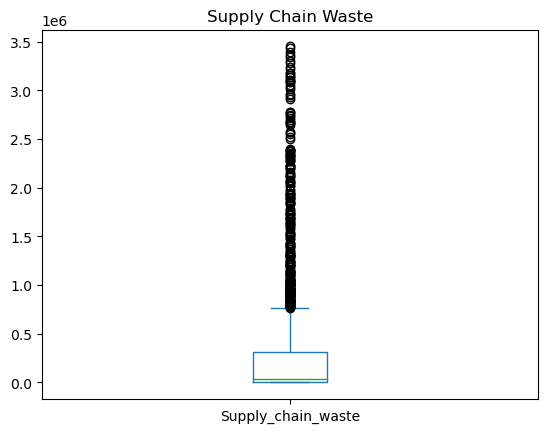

In [265]:
df['Supply_chain_waste'].plot(kind='box', title='Supply Chain Waste')

# Clean

In [266]:
df.to_csv('clean-global-food.csv',
          index=False)

In [267]:
df['Supply_chain_waste'].describe()

count    1.065100e+04
mean     2.622519e+05
std      4.312211e+05
min      0.000000e+00
25%      3.000000e+03
50%      3.300000e+04
75%      3.075000e+05
max      3.453000e+06
Name: Supply_chain_waste, dtype: float64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10651 entries, 0 to 10808
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             10651 non-null  object 
 1   Year                10651 non-null  float64
 2   Population          10651 non-null  float64
 3   Production          10651 non-null  float64
 4   Yield               10651 non-null  float64
 5   Land_used           10651 non-null  float64
 6   Imports             10651 non-null  float64
 7   Exports             10651 non-null  float64
 8   Domestic_supply     10651 non-null  float64
 9   Food                10651 non-null  float64
 10  Animal_feed         10651 non-null  float64
 11  Supply_chain_waste  10651 non-null  float64
 12  Continent           10651 non-null  object 
dtypes: float64(11), object(2)
memory usage: 1.1+ MB
